# Face Detection

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nadia = cv2.imread('Computer-Vision-with-Python/DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)

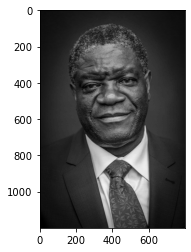

In [4]:
plt.imshow(denis,cmap='gray')

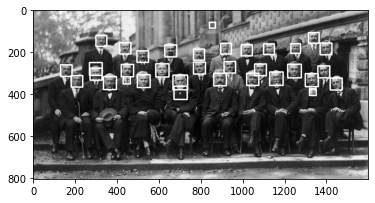

In [5]:
# initialize a long list or cascade of features for faces
face_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')
# lets create a function for it
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),5)
    return face_img

# lets create a result variable applying our function to Denis
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

        

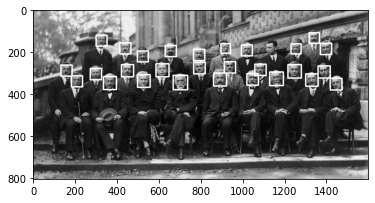

In [6]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),5)
    return face_img

result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

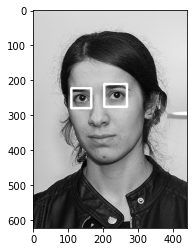

In [7]:
# initialize a long list or cascade of features for eyes
eye_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')
# lets create a function for it
def detect_eyes(img):
    eyes_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(eyes_img)
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(eyes_img,(x,y),(x+w,y+h),(255,255,255),5)
    return eyes_img

# lets create a result variable applying our eyes function to nadia
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

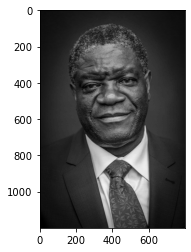

In [8]:
# lets create a result variable applying our eyes function to nadia
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [9]:
# Lets apply it to our webcam

cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()